<h1 style="font-family:verdana;">welcome to analysis of bank churn prediction using EDA(Exploratory Data Analysis) and LazyClassifire🏦</h1>

<p style="font-size:20px;">table of content</p>
<ul style="font-size:18px">
    <li>Introduction</li>
    <li>Importing Required Libaries</li>
    <li>Data Exploration</li>
    <li>Exploratory Data Analysis</li>
    <li>Modeling</li>
    <li>End Note</li>
</ul>

<h2 style="font-size:30px;">introduction</h2>
<p style="font-size:18px;">In the world of finance, customer retention is key to a bank's success. Therefore, understanding why customers churn is a crucial aspect of business strategy. In this dataset, we have 10000 bank customers and their churn status. The goal is to predict and classify customer churn using a lazy classifier(LazyClassifier has around 29 pre-trained models which will help us find out the best model on basis of accuracy and time taken.) and exploratory data analysis (EDA). By analyzing this dataset, we can gain insights into the factors that contribute to customer churn and develop strategies to retain customers and improve overall business performance</p>

<h2 style="font-size:30px;">importing required libaries</h2>

In [1]:
!pip3 install -U lazypredict

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import lazypredict
from lazypredict.Supervised import LazyClassifier


<h2 style="font-size:34px;">Data Exploration</h2>

<p style="font-size:20px">in Data Exploration our goal is summarized in:</p>
<ul style="font-size:17px">
    <li>Features Description</li>
    <li>Null Value Distribution</li>
    <li>Data Cleaning</li>
    <li>Important Observations</li>
</ul>


<div style="font-size:15px; font-family:verdana;"><h2 style="font-family:verdana;font-size:20px">Feature Description:</h2>

<ol>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Customer ID</code> - Unique ID given to identify a particular customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Credit Score</code> - It is the score which determines the creditworthiness of a customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Country</code> - The country where customer lives.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Gender</code> - The Sex of customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Age</code> - The age of customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Tenure</code> - Number of years the customer has Bank Account in that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Balance</code> - Amount of money present in customer's bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Products Number</code> - Number of Products from that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Credit Card</code> - Does the customer own a credit card of that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Active Member</code> - Whether the customer is an active member of that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Estimated Salary</code> - Total Income of the Customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Churn</code> - Churn (Loss of existing customers) of the Bank.</li>
</ol>
</div>

In [3]:
df = pd.read_csv("../input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 12)

In [5]:
# note: churn must be int for our modeling
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

<h2 style="font-family:verdana;font-size:20px">Null Value Distribution</h2>

In [9]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<h2 style="font-family:verdana;font-size:20px">Data Cleaning</h2>
<p style="font-size:16px">according we do not have any null values we can keep moving forward but for more information about the procces of data cleaning visit link below: <br>
    <a href="https://www.kaggle.com/getting-started/250322">Data Cleaning Process</a><br>
    <code style="font-family:verdana;">Customer ID</code>-Since It is useless, we will drop it. This will reduce the Time taken by model and will also boost accuracy significantly.

</p>

In [10]:
df.drop('customer_id', axis=1)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<h3 style="font-family:verdana;font-size:20px">⭐Important Obsevation</h3>
<ul style="font-size:20px">
    <li>There are total of 12 columns and 10000 rows in data.</li>
    <li>no missing value.</li>
    <li>costumer id dropped</li>
    <li>target is churn(binary 0 or 1)</li>
    <li>costumers are from 3 countires</li>
</ul>

<h2 style="font-size:34px;">Exploratory Data Analysis</h2>
<p style="font-size:18px;">Exploratory data analysis (EDA) is a process of analyzing and summarizing data sets to gain insights and understanding about the data. EDA involves using statistical and visualization techniques to identify patterns, trends, and relationships in the data, as well as to detect any outliers or anomalies. The goal of EDA is to explore the data in a way that helps to generate hypotheses, test assumptions, and inform further analysis.

<p style="font-size: 18px">verifying the correlation between our variables using HEATMAP</p>

<p>In machine learning projects, a <b>heatmap</b> can be used to visualize the correlation between features in a dataset. A heatmap is a graphical representation of data where the values are represented by colors. In the context of machine learning, a heatmap can help to identify which features are most strongly correlated with each other, and which features are most strongly correlated with the target variable. This information can be used to inform feature selection or engineering, as well as to understand the relationships between variables in the dataset. Heatmaps can also be used to identify any missing or incomplete data in the dataset.</p>

<Axes: >

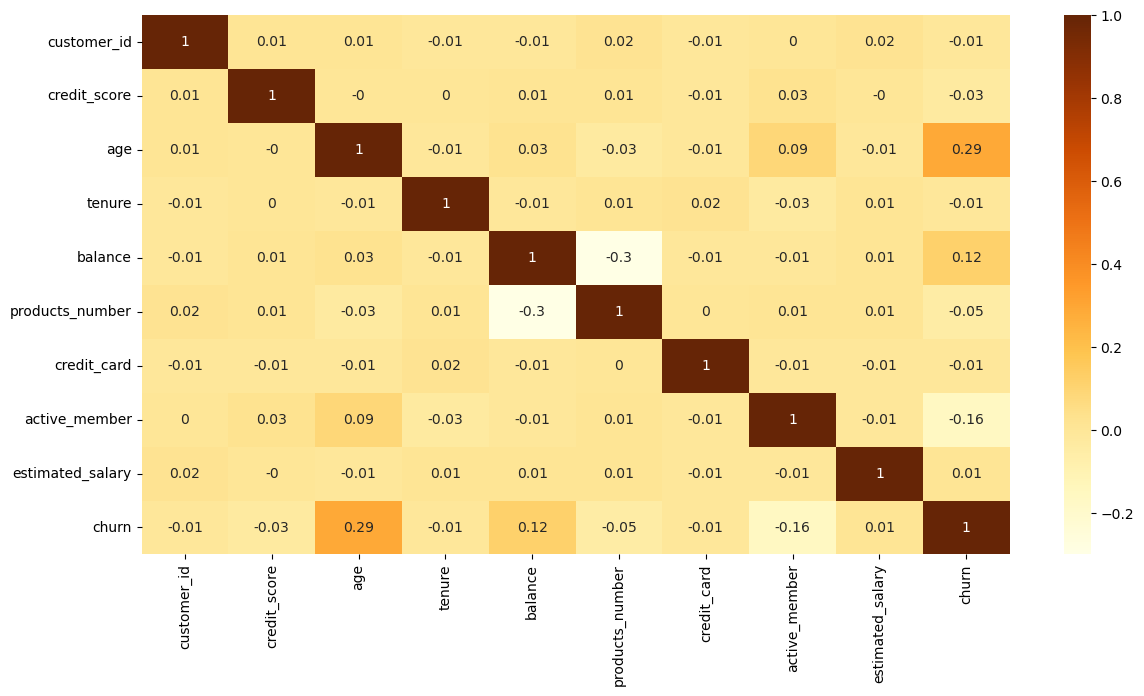

In [11]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')


<p>checking the correlation between our variables, here we can see that we don't have a strong correlation between the variables</p>

<p style="font-size: 18px"><b>categorical variables</b><p>

<Axes: xlabel='churn', ylabel='count'>

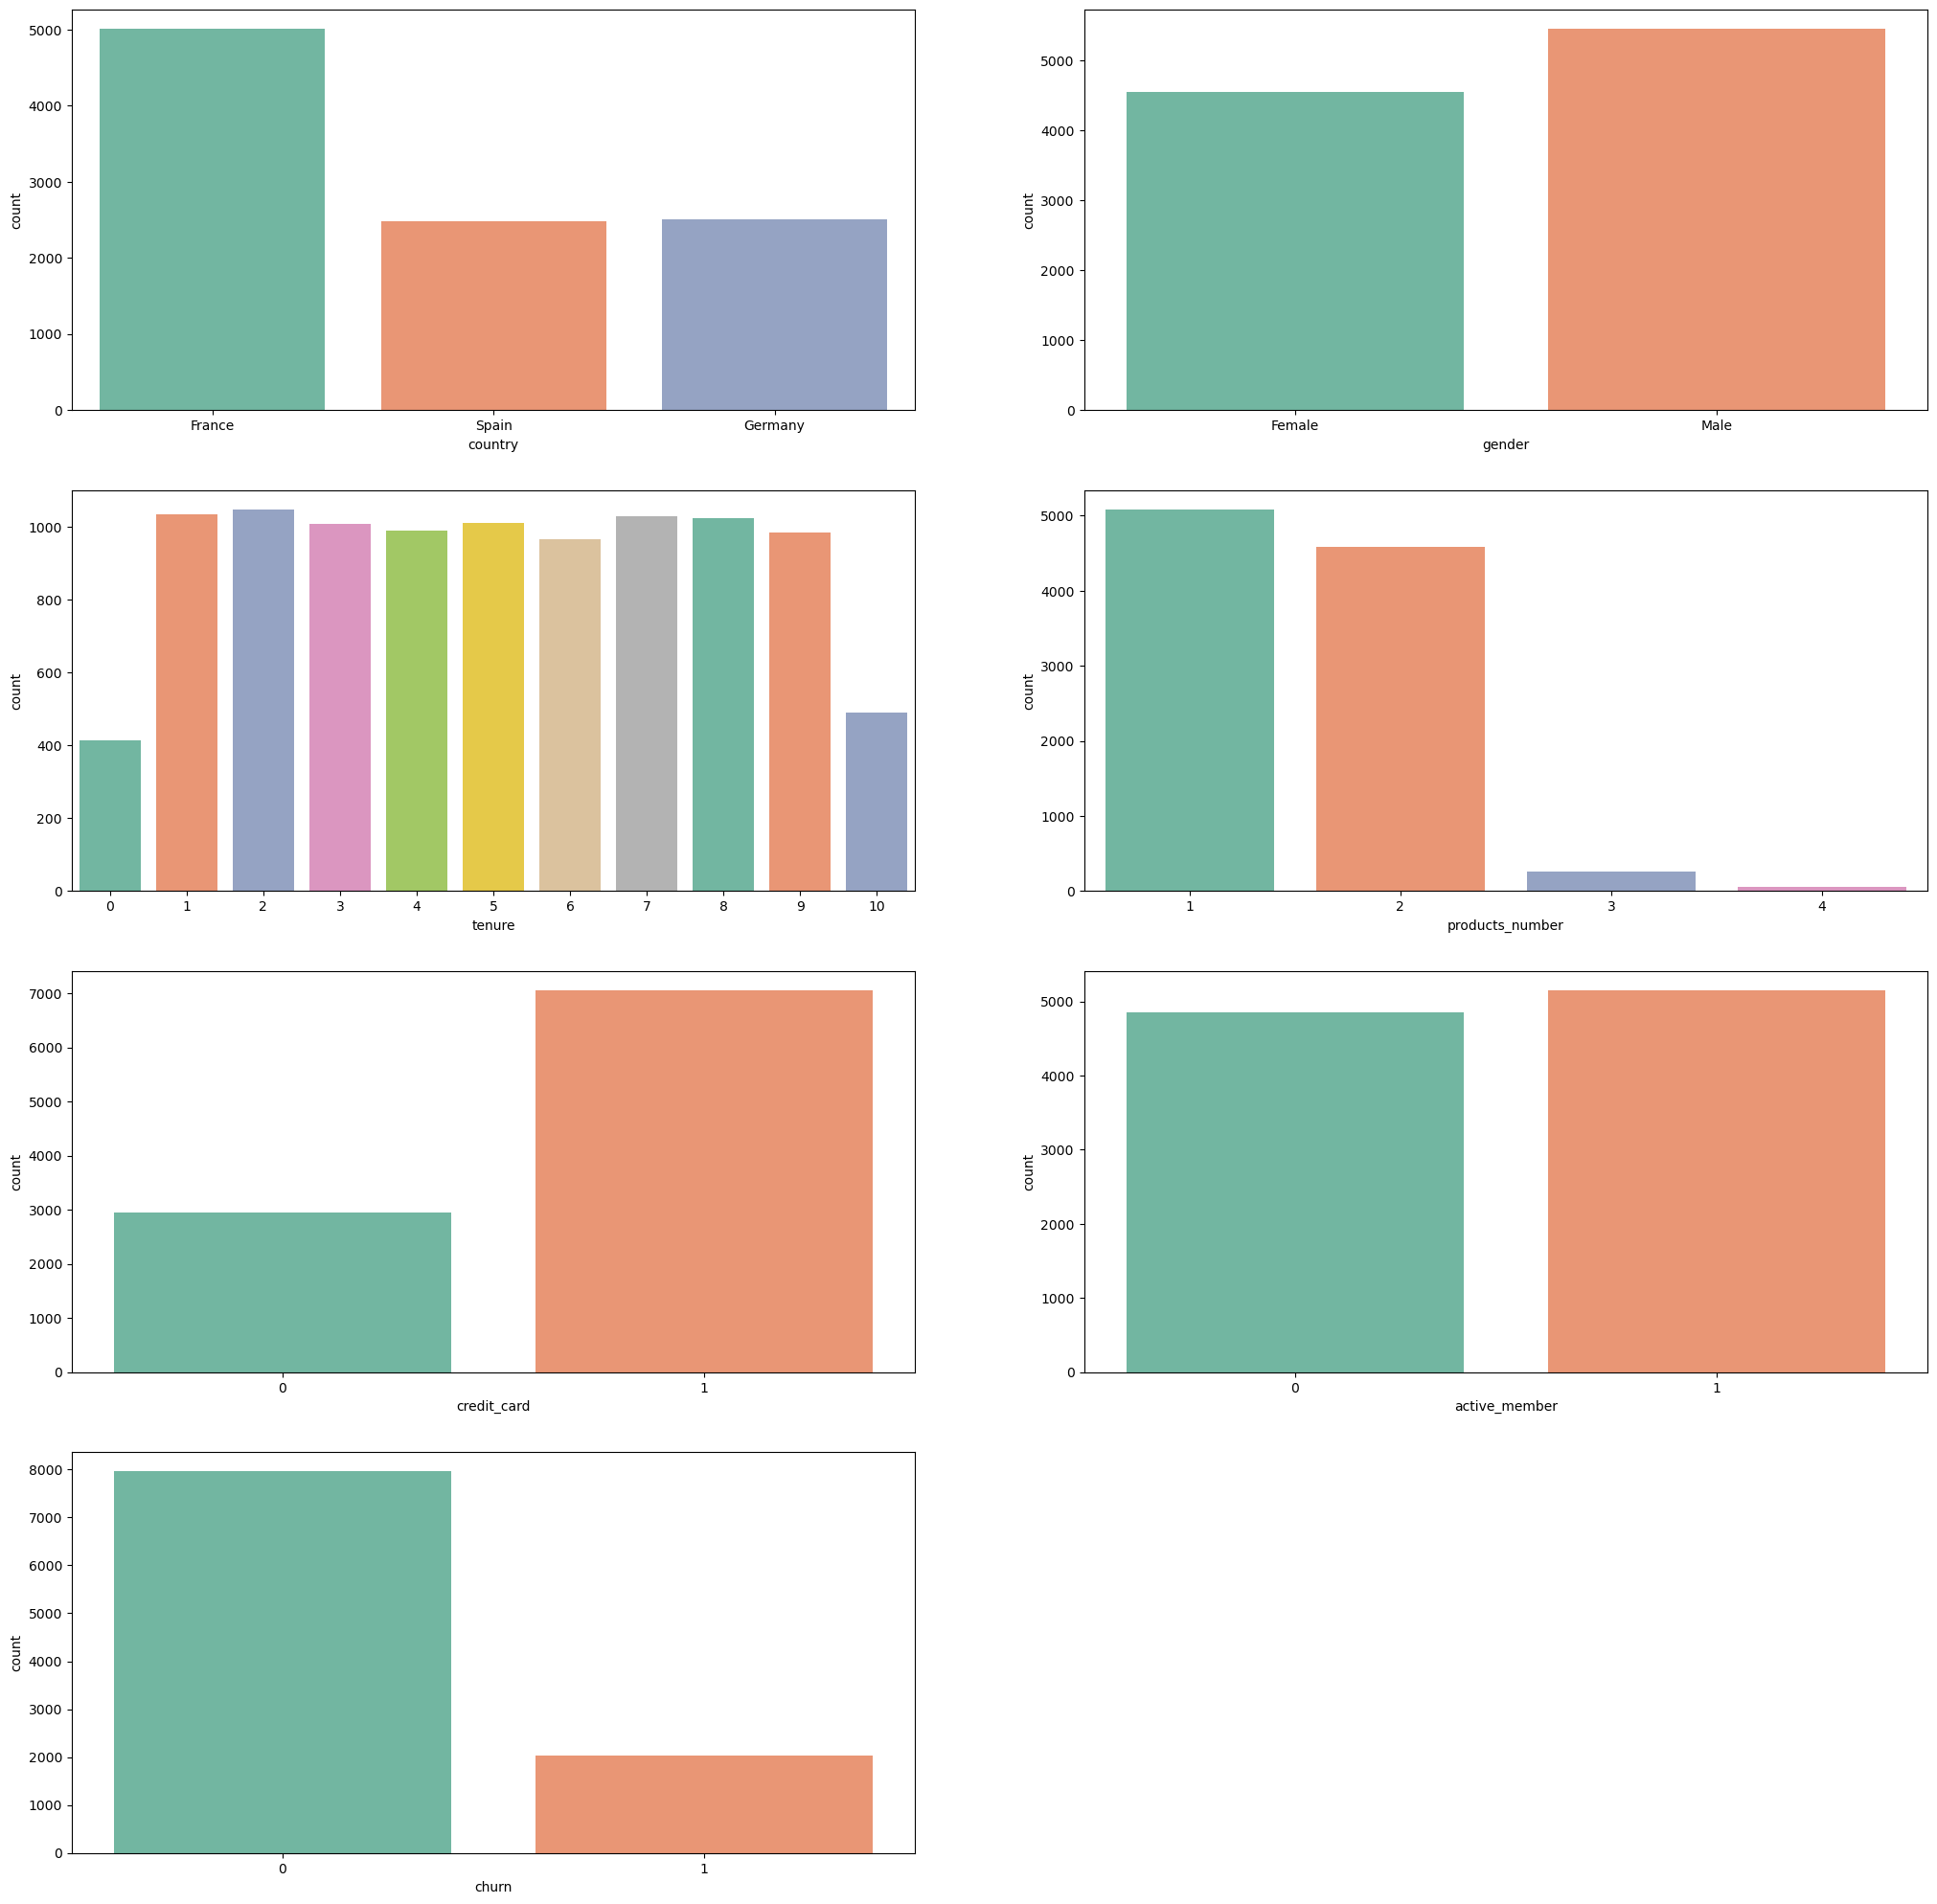

In [12]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette='Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='Set2', data = df)

<p style="font-size: 18px"><b>Bivariate Analysis</b><p>


<Axes: xlabel='churn', ylabel='count'>

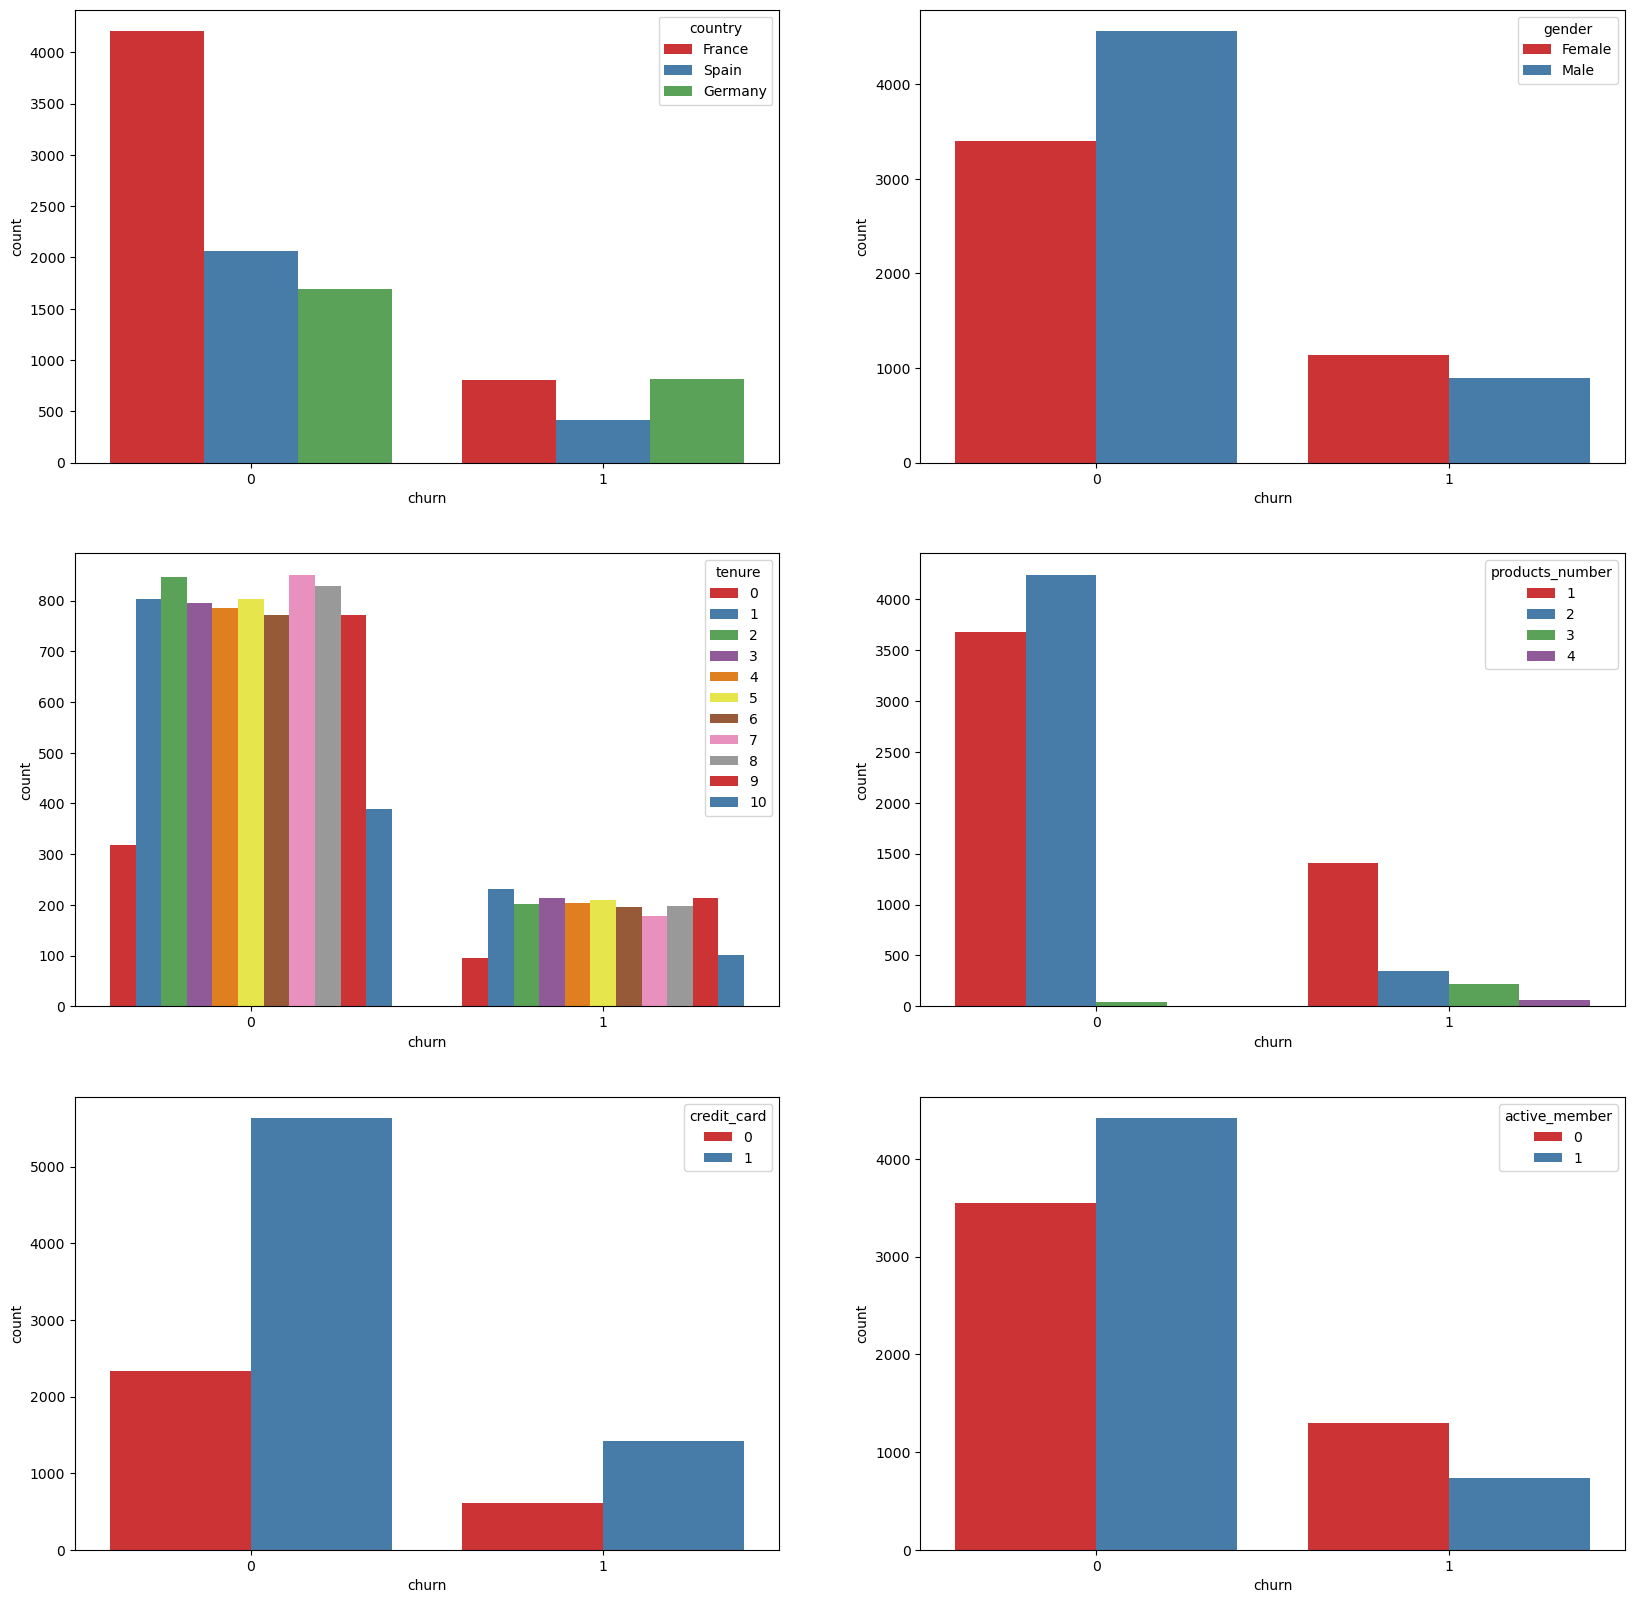

In [13]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='Set1', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='Set1', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='Set1', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='Set1', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set1', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set1', data = df)

In [14]:
features = df.keys()
features = features.drop('churn')
subsets = ['credit_score']
df.groupby('churn')[features].mean().style.background_gradient(cmap = "ocean")

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691167.881703,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,15690051.964654,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [15]:
df.groupby('churn')[features].median().style.background_gradient(cmap = "ocean")

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691543.000000,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000
1,15688963.000000,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000


<h3>⭐important observation</h3>
<ul>
    <li>Around 20% of the customers have Churned</li>
    <li>Age has the highest positive correlation with the Churned Customers. Hence we can say that older customers are more likely to churn than the younger ones.</li>
    <li>Females have churned more than Males.</li>
    <li>Customers with credit card have churned more than people who do not have it. May be because credit card influences your spending habits in a negative way.</li>
    <li>People who are active member of bank have churned less than those who are'nt.</li>
    <li>Credit Score and Estimated Salary are almost same for both churned and not churned people.</li>
    <li>The percent of French people churned is least and that of German is most.</li>
</ul>

<h2>Modeling</h2>

<h3>Data Preprocessing</h3>

In [16]:
# select X and y values
X = df.iloc[:, 1:10].values
X[0:5]


array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1]], dtype=object)

In [17]:
y = df.iloc[:, 11].values
y[0:5]

array([1, 0, 1, 0, 0])

<h4>balancing classes</h4>
<p>to undrestand why balancing is nessesary <a href="https://analyticsindiamag.com/what-is-imblearn-technique-everything-to-know-for-class-imbalance-issues-in-machine-learning/#:~:text=Imblearn%20techniques%20are%20the%20methods,that%20are%20Upsampling%20and%20Downsampling.">click here</a> </p>

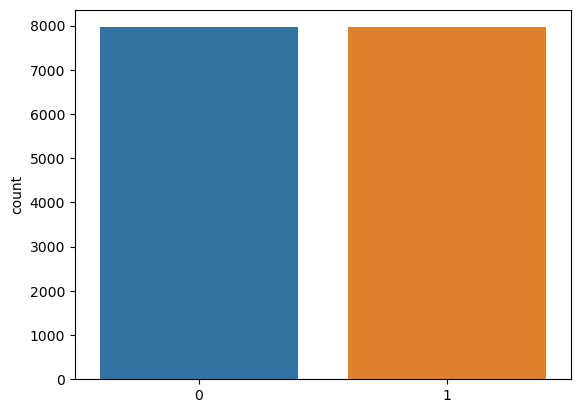

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

<h4>Label Encoder</h4>
<p>Using LabelEncoder to transform categorical variables into continuous variables.</p>


In [19]:
le_gender = LabelEncoder()
le_gender.fit(['Female', 'Male'])
X[:,2] = le_gender.transform(X[:,2])

le_country = LabelEncoder()
le_country.fit(['France', 'Spain', 'Germany'])
X[:,1] = le_country.transform(X[:,1])


In [20]:
X[0:10]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1]], dtype=object)

<h4> standard scaler </h4>

In [21]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard[0:10]

array([[-0.29877723, -0.95773012, -1.01799435,  0.08418894, -1.01840607,
        -1.33103279, -0.75606167,  0.6512495 ,  1.08223556],
       [-0.4103938 ,  1.54539778, -1.01799435, -0.01032629, -1.36135608,
         0.03246589, -0.75606167, -1.53550983,  1.08223556],
       [-1.48597169, -0.95773012, -1.01799435,  0.08418894,  1.03929402,
         1.26654326,  2.20861596,  0.6512495 , -0.92401325],
       [ 0.51297967, -0.95773012, -1.01799435, -0.19935676, -1.36135608,
        -1.33103279,  0.72627714, -1.53550983, -0.92401325],
       [ 2.04517081,  1.54539778, -1.01799435,  0.17870418, -1.01840607,
         0.71094558, -0.75606167,  0.6512495 ,  1.08223556],
       [-0.03495624,  1.54539778,  0.98232373,  0.27321941,  1.03929402,
         0.51969882,  0.72627714,  0.6512495 , -0.92401325],
       [ 1.7610559 , -0.95773012,  0.98232373,  0.84031081,  0.696344  ,
        -1.33103279,  0.72627714,  0.6512495 ,  1.08223556],
       [-2.7644888 ,  0.29383383, -1.01799435, -1.14450909, -0

<h4> train/split data </h4>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.3, random_state=0)
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(11148, 9) (4778, 9)
(11148,) (4778,)


<h4>Model Implementation</h4>

In [23]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:24<00:00,  1.18it/s]


In [24]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.95               0.95     0.95      0.95   
RandomForestClassifier             0.94               0.94     0.94      0.94   
BaggingClassifier                  0.93               0.93     0.93      0.93   
ExtraTreeClassifier                0.90               0.90     0.90      0.90   
LabelPropagation                   0.90               0.90     0.90      0.90   
LabelSpreading                     0.90               0.90     0.90      0.90   
DecisionTreeClassifier             0.90               0.90     0.90      0.90   
XGBClassifier                      0.88               0.88     0.88      0.88   
LGBMClassifier                     0.84               0.84     0.84      0.84   
KNeighborsClassifier               0.82               0.82     0.82      0.82   
NuSVC                       

<h2>EngNote</h2>
<p>If you liked my notebook please support with an upvote 👍,and feel free to give any suggestions in the comment box.</p>